<a href="https://colab.research.google.com/github/Saksham0905/youtubeanalysis/blob/main/mlproject4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import datetime
import wordcloud
import json
df=pd.read_csv('/content/USvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


In [ ]:
plt.rcParams['font.family'] = 'DejaVu Sans'

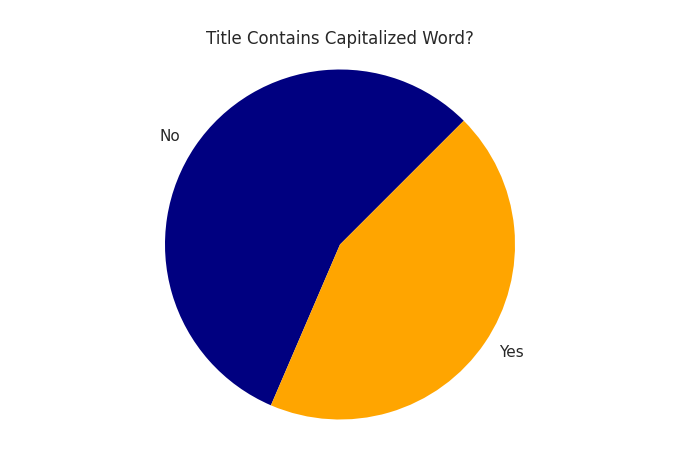

In [ ]:
def containscapitalword(tit):
  for w in tit.split():
    if w.isupper():
      return True
  return False
df['capwords']=df['title'].apply(containscapitalword)
noofcapwords=df['capwords'].value_counts().to_dict()
fig,ax=plt.subplots()
ax.pie([noofcapwords[False],noofcapwords[True]],labels=['No','Yes'],startangle=45,colors=['navy','orange'])
ax.axis('equal')
ax.set_title('Title Contains Capitalized Word?')
plt.show()

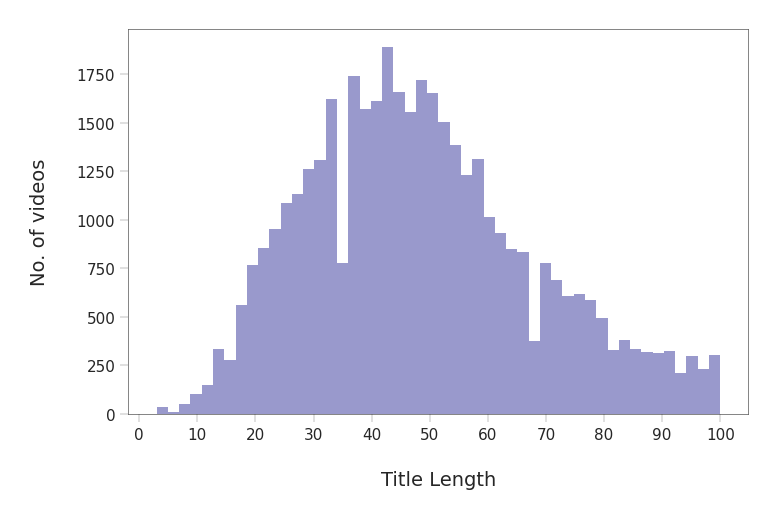

In [ ]:
df['titlelength']=df['title'].apply(lambda x:len(x))
fig,ax=plt.subplots()
sns.distplot(df['titlelength'],color='navy',rug=False,kde=False)
ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))
plt.grid(False)
plt.show()

[Text(0.5, 0, 'Views'), Text(0, 0.5, 'Title Length')]

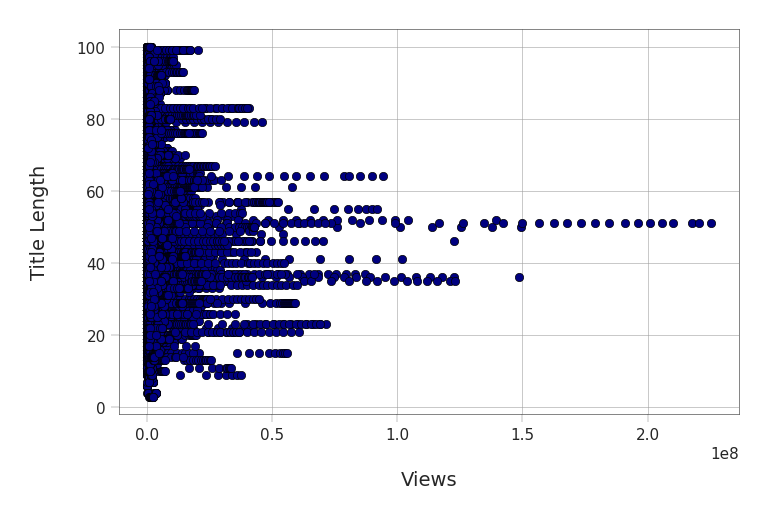

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x=df['views'], y=df['titlelength'], color='navy',edgecolors='#000000',linewidths=0.5)
ax.set(xlabel="Views", ylabel="Title Length")

<Axes: >

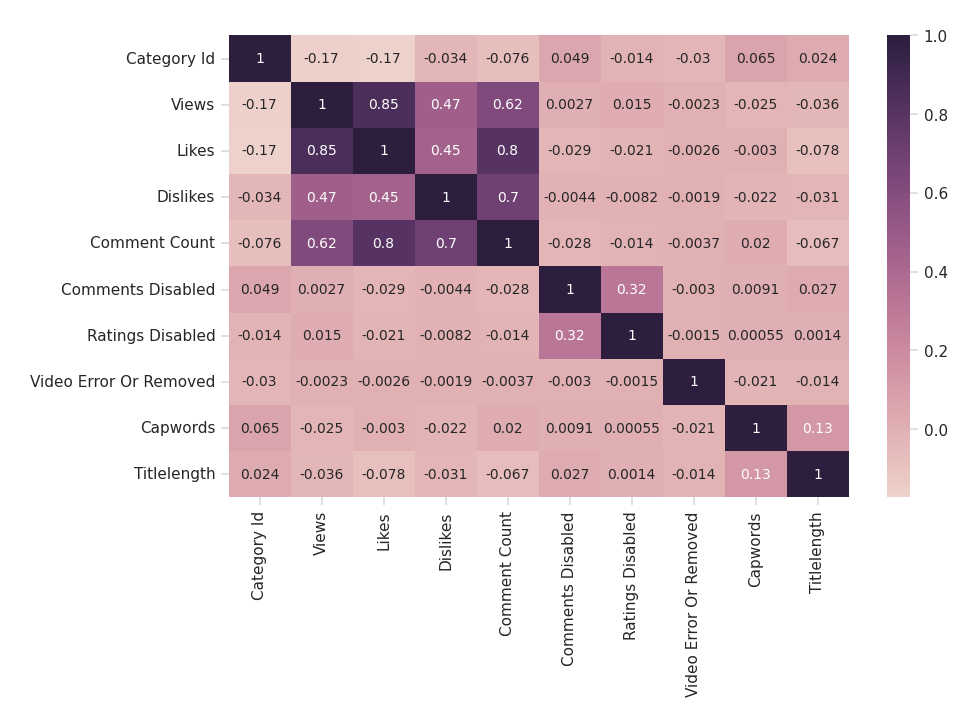

In [ ]:
labels=[x.replace('_',' ').title() for x in list(df.select_dtypes(include=['number','bool']).columns.values)]
fig, ax = plt.subplots(figsize=(10,6))
# Calculate the correlation matrix only for numeric features
corr_matrix = df.select_dtypes(include=['number','bool']).corr()
sns.heatmap(corr_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

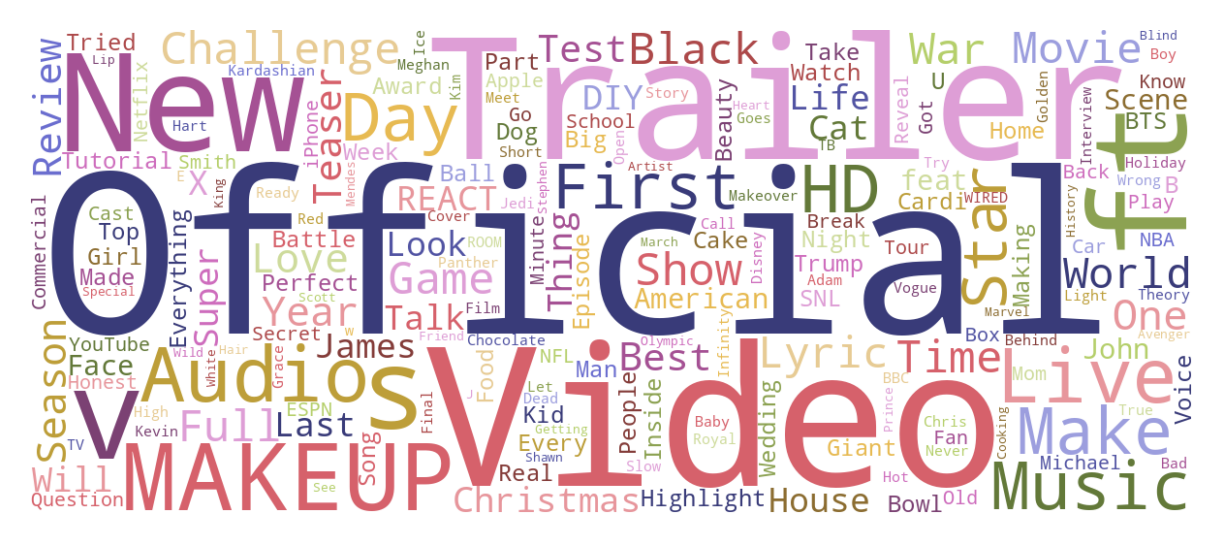

In [ ]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
wc = wordcloud.WordCloud(width=1200, height=500,
                         collocations=False, background_color="white",
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")